In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
instancias_wp = ["1", "2", "3"]
qtd_usuarios_teste = ["10", "100", "650", "1000"]

df_results = pd.DataFrame()

for instancia_wp in instancias_wp:
    for qtd_usuarios in qtd_usuarios_teste:
        df = pd.read_csv(f"tests/wp-{instancia_wp}/{qtd_usuarios}/requests.csv")
        df["Wp Instance"] = instancia_wp
        df["Users Size"] = qtd_usuarios
        df["95%"] = df["95%"] / 1000
        df_results = pd.concat([df_results, df]).reset_index(drop=True)
        df_results = df_results[df_results["Name"] == "Aggregated"]

df_results

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,80%,90%,95%,98%,99%,99.9%,99.99%,100%,Wp Instance,Users Size
0,NaN,Aggregated,1189,0,45.0,39.816203,24.9214,83.8566,426193.998318,1.321527,...,49,50,0.052,57,65,81,84,84,1,10
1,NaN,Aggregated,11882,0,44.0,40.724959,23.9084,1447.5049,410836.579448,13.204084,...,48,51,0.053,58,64,490,1400,1400,1,100
2,NaN,Aggregated,76988,15,61.0,80.507275,1.4389,1888.2615,409472.871512,85.523900,...,91,110,0.140,270,490,1500,1700,1900,1,650
3,NaN,Aggregated,98311,1357,1400.0,1594.639862,8.2654,10073.0225,404098.663751,109.224466,...,2300,3000,3.600,4400,5000,6700,8400,10000,1,1000
4,NaN,Aggregated,1178,0,45.0,39.998781,25.2640,296.9235,426663.974533,1.309772,...,49,50,0.052,54,57,280,300,300,2,10
5,NaN,Aggregated,11920,0,44.0,39.909765,24.5173,99.7669,409200.581376,13.245057,...,49,51,0.054,58,62,86,99,100,2,100
6,NaN,Aggregated,77041,19,64.0,72.965256,1.7386,679.2612,409522.565219,85.603803,...,94,110,0.130,170,220,460,640,680,2,650
7,NaN,Aggregated,104687,548,930.0,1050.864568,12.5132,5286.6739,408688.774318,116.235953,...,1500,1800,2.100,2500,2800,3700,4900,5300,2,1000
8,NaN,Aggregated,1187,0,44.0,39.950824,25.2730,70.9516,410290.890480,1.319774,...,49,51,0.052,54,55,63,71,71,3,10
9,NaN,Aggregated,11897,0,45.0,41.721220,24.6749,290.3781,404607.712617,13.219078,...,50,52,0.056,72,100,230,290,290,3,100


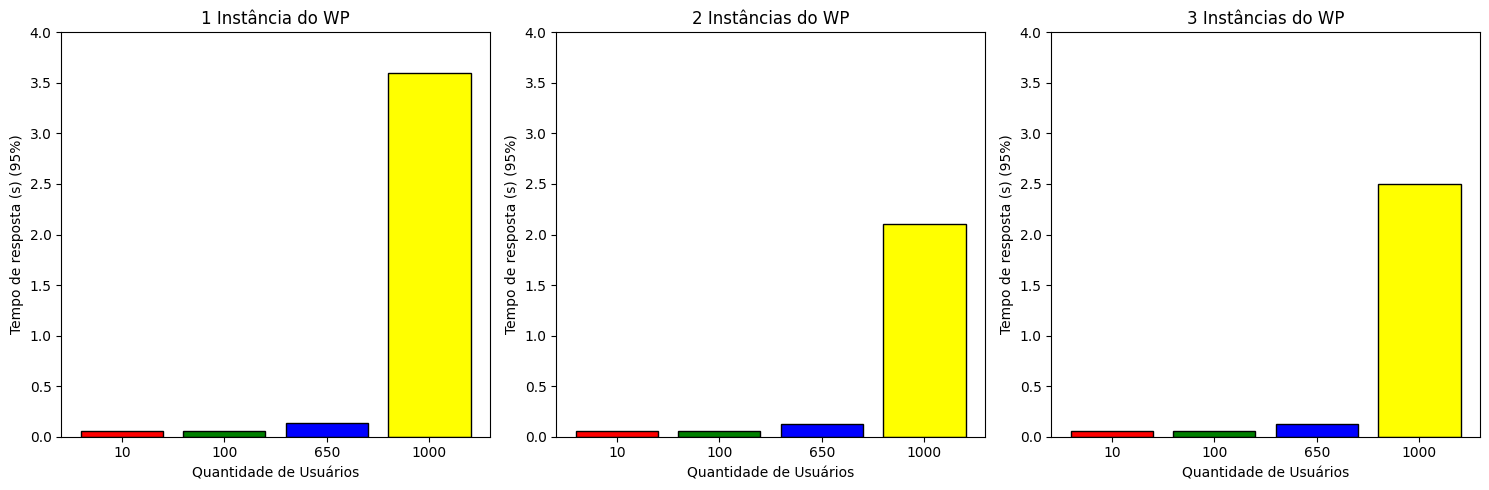

In [7]:
qtd_instancias = len(instancias_wp)
width_fig = 5
fig, axs = plt.subplots(
    1,
    qtd_instancias,
    tight_layout=True,
    figsize=(qtd_instancias * width_fig, width_fig),
)

colors = ["red", "green", "blue", "yellow"]

for i, qtd_usuarios in enumerate(instancias_wp):
    df = df_results[df_results["Wp Instance"] == qtd_usuarios]
    axs[i].set_ylim(0, 4)
    axs[i].set_title(f"{i + 1} {'Instância' if i == 0 else 'Instâncias'} do WP")
    axs[i].bar(
        df["Users Size"],
        df["95%"],
        color=colors,
        edgecolor="black",
    )
    axs[i].set_xlabel("Quantidade de Usuários")
    axs[i].set_ylabel("Tempo de resposta (s) (95%)")

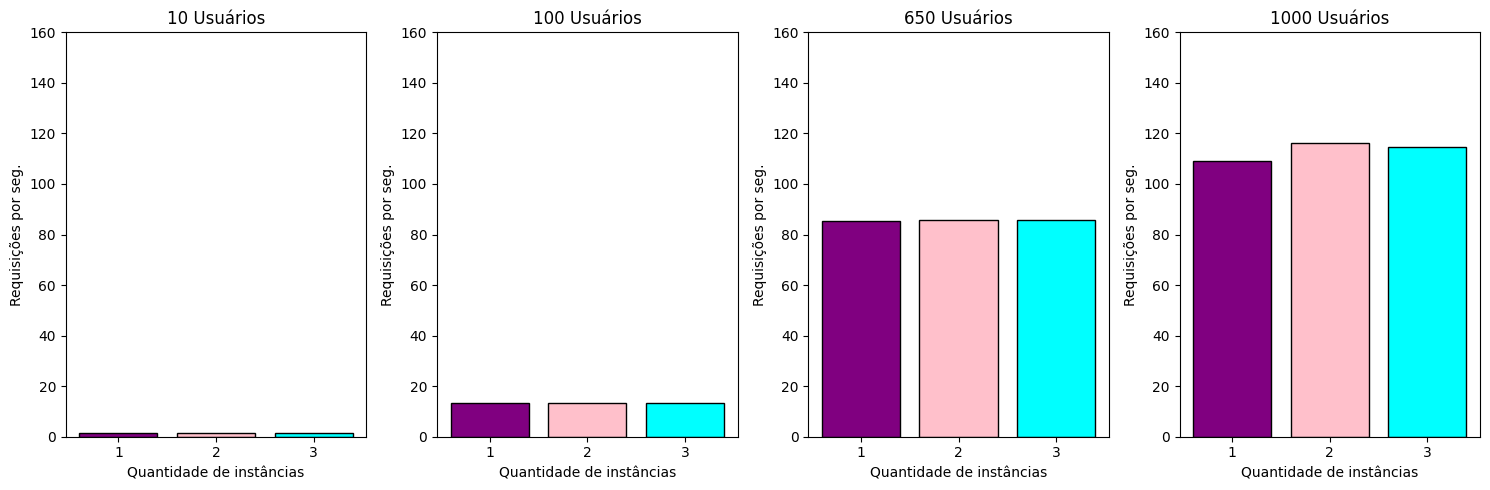

In [8]:
fig, axs = plt.subplots(1, len(qtd_usuarios_teste), tight_layout=True, figsize=(15, 5))

colors = ["purple", "pink", "cyan"]

for i, qtd_usuarios in enumerate(qtd_usuarios_teste):
    df = df_results[df_results["Users Size"] == qtd_usuarios]
    axs[i].set_ylim(0, 160)
    axs[i].set_title(f"{qtd_usuarios} Usuários")
    axs[i].bar(
        df["Wp Instance"],
        df["Requests/s"],
        color=colors,
        edgecolor="black",
    )
    axs[i].set_xlabel("Quantidade de instâncias")
    axs[i].set_ylabel("Requisições por seg.")